# RT626 HW1 #1 Keggle 이미지 세트를 활용하여 CNN 구성하기 
## Directory 구조 조정하기

기본 데이터셋에는 25000장의 사진이 있는데 문제에서 제시한 바와 같이 Train에 1000장 Validation에 500장 Test에 500장을 할당하는 과정을 진행

In [1]:
import os, shutil

exec_path = os.getcwd()
root_path = os.path.join(exec_path,'dataset\\dogs-vs-cats')

origin_trainset_path = os.path.join(root_path,'train')

new_trainset_path = os.path.join(root_path,'n_train')
new_validationset_path = os.path.join(root_path,'n_validation')
new_testset_path = os.path.join(root_path,'n_test')

if not(os.path.isdir(new_trainset_path)):
    os.mkdir(new_trainset_path)
if not(os.path.isdir(new_validationset_path)):
    os.mkdir(new_validationset_path)
if not(os.path.isdir(new_testset_path)):
    os.mkdir(new_testset_path)


## 필요한 File 복사하기
만들어진 Directory에 많은 양의 데이터에서 소량의 데이터만 가져오는 코드

In [3]:
if not(os.path.isfile(new_trainset_path+'\\0\\cat.0.jpg')):
    os.mkdir(new_trainset_path+'\\0')
    print('copying process start...')
    fnames = ['cat.{}.jpg'.format(i) for i in range(500)]
    for fname in fnames:
        src = os.path.join(origin_trainset_path, fname)
        dst = os.path.join(os.path.join(new_trainset_path,'0'), fname)
        shutil.copy(src, dst)

if not(os.path.isfile(new_validationset_path+'\\0\\cat.500.jpg')):
    os.mkdir(new_validationset_path+'\\0')
    print('copying process start...')
    fnames = ['cat.{}.jpg'.format(i) for i in range(500,750)]
    for fname in fnames:
        src = os.path.join(origin_trainset_path, fname)
        dst = os.path.join(os.path.join(new_validationset_path,'0'), fname)
        shutil.copy(src, dst)

if not(os.path.isfile(new_testset_path+'\\0\\cat.750.jpg')):
    os.mkdir(new_testset_path+'\\0')
    print('copying process start...')
    fnames = ['cat.{}.jpg'.format(i) for i in range(750,1000)]
    for fname in fnames:
        src = os.path.join(origin_trainset_path, fname)
        dst = os.path.join(os.path.join(new_testset_path,'0'), fname)
        shutil.copy(src, dst)

if not(os.path.isfile(new_trainset_path+'\\1\\dog.0.jpg')):
    os.mkdir(new_trainset_path+'\\1')
    print('copying process start...')
    fnames = ['dog.{}.jpg'.format(i) for i in range(500)]
    for fname in fnames:
        src = os.path.join(origin_trainset_path, fname)
        dst = os.path.join(os.path.join(new_trainset_path,'1'), fname)
        shutil.copy(src, dst)

if not(os.path.isfile(new_validationset_path+'\\1\\dog.500.jpg')):
    os.mkdir(new_validationset_path+'\\1')
    print('copying process start...')
    fnames = ['dog.{}.jpg'.format(i) for i in range(500,750)]
    for fname in fnames:
        src = os.path.join(origin_trainset_path, fname)
        dst = os.path.join(os.path.join(new_validationset_path,'1'), fname)
        shutil.copy(src, dst)

if not(os.path.isfile(new_testset_path+'\\1\\dog.750.jpg')):
    os.mkdir(new_testset_path+'\\1')
    print('copying process start...')
    fnames = ['dog.{}.jpg'.format(i) for i in range(750,1000)]
    for fname in fnames:
        src = os.path.join(origin_trainset_path, fname)
        dst = os.path.join(os.path.join(new_testset_path,'1'), fname)
        shutil.copy(src, dst)


## CNN 네트워크를 구성하기
이번 프로젝트에서는 Keras에서 제공하는 함수를 사용하여 CNN Layer를 생성하고 해당 네트워크를 학습함

In [4]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

from keras import models, layers, optimizers
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

## Network의 Hyperparameter를 설정하기
keras에서 제공하는 함수를 사용하여 Network를 설정한다.

In [5]:
from keras import models, layers, optimizers
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Input 이미지를 정규화하기
이미지의 RGB 값은 알다시피 색상 별로 8-16bit 스케일로 표현된다. 활성함수는 대부분 이 값에 exponential한 값이 출력되기 때문에 input이 커지면 연산량도 많아진다. 따라서 이 값을 정규화하여 작은 스케일 [0,1]으로 선형 변환한다.

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    new_trainset_path,
    target_size=(150, 150),
    batch_size=20,
    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
    new_validationset_path,
    target_size=(150, 150),
    batch_size=20,
    class_mode = 'binary')

Found 1000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


## Network 학습시키기
앞서 Network의 형태는 함수를 이용해서 구성했다. 이후 학습에 사용될 이미지의 Path까지 함수를 이용하여 설정했다. 따라서 학습을 진행할 수 있다. 다음과 같은 코드를 통해서 네트워크를 학습시킬 수 있다.

In [20]:
history = model.fit_generator(
    train_generator, steps_per_epoch = 30, epochs=30, 
    validation_data=validation_generator, validation_steps=50
    )

d:\onedrive - dgist.ac.kr\1.dgist\1.수업\2021년 1학기\지능시스템설계\hw1\rt626\.rt626\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
Epoch 1/30
30/30 [==============================] - 13s 420ms/step - loss: 0.2142 - acc: 0.9217 - val_loss: 0.6279 - val_acc: 0.7240
Epoch 2/30
30/30 [==============================] - 11s 351ms/step - loss: 0.2131 - acc: 0.9217
Epoch 3/30
30/30 [==============================] - 11s 357ms/step - loss: 0.2016 - acc: 0.9183
Epoch 4/30
30/30 [==============================] - 11s 367ms/step - loss: 0.1675 - acc: 0.9483
Epoch 5/30
30/30 [==============================] - 11s 382ms/step - loss: 0.1753 - acc: 0.9283
Epoch 6/30
30/30 [==============================] - 11s 357ms/step - loss: 0.1739 - acc: 0.9433
Epoch 7/30
30/30 [============================

## 학습된 모델을 저장하기.
fit 함수를 통해서 우리가 설계한 Network를 학습시켰다. 학습된 Network를 추후에 사용하기 위해서 네트워크를 저장할 수 있다.

In [22]:
model.save('cat_and_dogs_small_batch20_epoch30.h5')

2.4.1
2.4.3


## 학습 결과를 Visulize하기.
우리가 학습한 Network의 성능을 쉽게 알아볼 수 있도록 그래프를 이용해서 특성을 Plot한다.



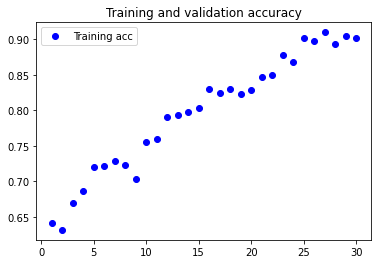

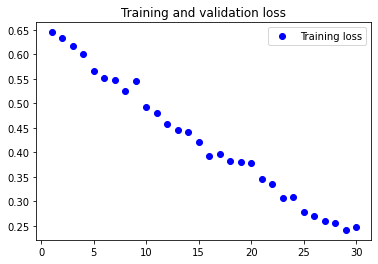

In [14]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'bo', label= 'Training acc')
# plt.plot(epochs, val_acc, 'b', label= 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label= 'Training loss')
# plt.plot(epochs, val_loss, 'b', label= 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [19]:
print(val_acc)
print(acc)

[0.5820000171661377]
[0.6416666507720947, 0.6316666603088379, 0.6700000166893005, 0.6866666674613953, 0.7200000286102295, 0.721666693687439, 0.7283333539962769, 0.7233333587646484, 0.70333331823349, 0.7549999952316284, 0.7599999904632568, 0.7900000214576721, 0.7933333516120911, 0.7983333468437195, 0.8033333420753479, 0.8299999833106995, 0.824999988079071, 0.8299999833106995, 0.8233333230018616, 0.82833331823349, 0.846666693687439, 0.8500000238418579, 0.878333330154419, 0.8683333396911621, 0.9016666412353516, 0.8983333110809326, 0.9100000262260437, 0.8933333158493042, 0.9049999713897705, 0.9016666412353516]
